In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis
import pack_dimer
import pack_vis_sol
import pack_cost
import numpy as np
import cupy as cp
import copy
kgs.set_float32(True)

local


In [2]:
import pack_io
importlib.reload(pack_io)
import pandas as pd
theirs = pack_io.dataframe_to_solution_list(pd.read_csv(kgs.temp_dir + '71.66.csv'))

In [3]:
# from tqdm import tqdm
# import multiprocess

# multiprocess.set_start_method('spawn', force=True)

# def do_one(sol):
#     import pack_io
#     import kaggle_support as kgs
#     kgs.set_float32(True)
#     return pack_io.legalize(sol)

# with multiprocess.Pool(processes=5) as pool:
#     overall_best_legalized = list(
#         tqdm(
#             pool.imap(do_one, overall_best),
#             total=len(overall_best),
#             desc="Legalizing"
#         )
#     )
# #kgs.dill_save(kgs.temp_dir + 'tess_legalized.pickle', overall_best_legalized)
# kgs.dill_save(kgs.code_dir + '../res/tess_legalized.pickle', pop)
overall_best_legalized = kgs.dill_load(kgs.code_dir + '../res/tess_legalized.pickle')
for s in overall_best_legalized:
    s.xyt = s.xyt.astype(kgs.dtype_cp)
    s.h = s.h.astype(kgs.dtype_cp)
overall_best_legalized_score = [(x.h[0,0]**2/x.N_trees).get() for x in overall_best_legalized]
mine = (overall_best_legalized, overall_best_legalized_score)

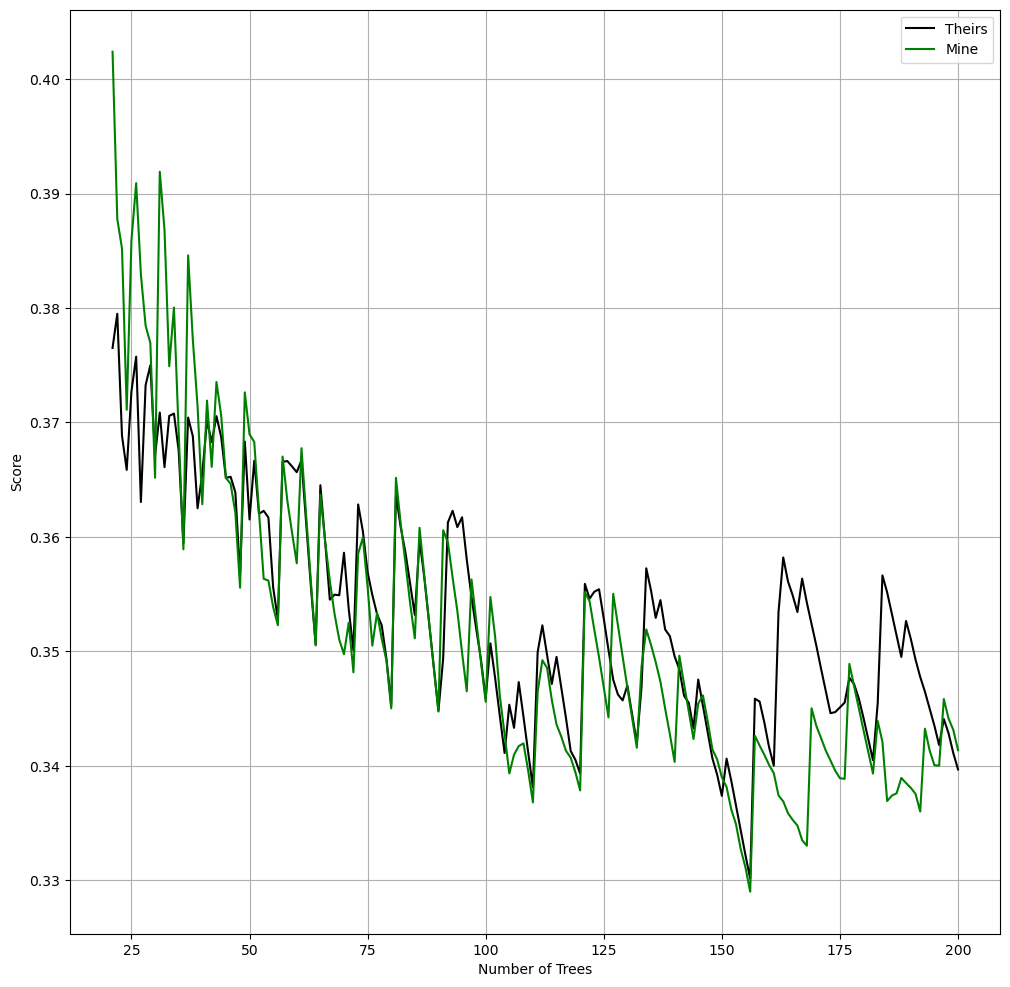

In [4]:
import mplcursors
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
N_trees = np.arange(1,201)
N=20
lines = []
vals_res = np.array([np.inf]*200)
line = plt.plot(N_trees[N:], theirs[1][N:], 'k')
lines.extend(line)
line = plt.plot(N_trees[N:], mine[1][N:], 'g')
lines.extend(line)

plt.grid(True)
plt.legend(('Theirs', 'Mine'))
plt.xlabel('Number of Trees')
plt.ylabel('Score')

# Add interactive cursor for all lines
mplcursors.cursor(lines, hover=True)

In [5]:
import pack_io
import pack_cost
print(kgs.TREE_EXPANSION)
def check_sol(sol):
    for i,s in enumerate(sol[0]):
        print(i+1, pack_cost.CollisionCostSeparation().compute_cost_allocate(s)[0])
    #res = pack_io.solution_list_to_dataframe(sol[0], compact=False)
    print(np.sum(sol[1]))

#check_sol(theirs)
check_sol(mine)


9.999999999177334e-06
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundar

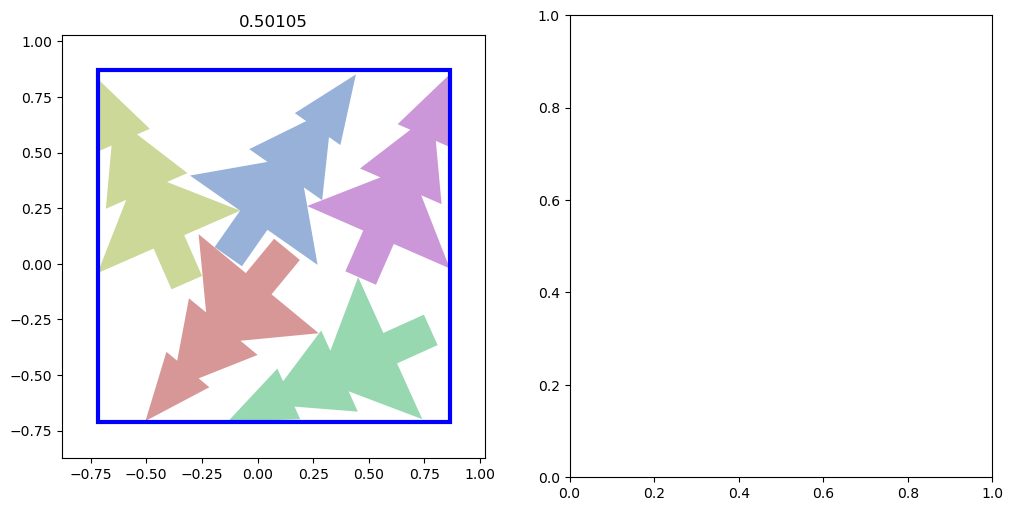

In [6]:
for N in [5]:
    _,ax = plt.subplots(1,2,figsize=(12,6))
    pack_vis_sol.pack_vis_sol(mine[0][N-1], solution_idx=0, ax=ax[0])
    plt.sca(ax[0])
    plt.title(mine[1][N-1])
    # sol2 = copy.deepcopy(sol_list_ref[N-1])
    # sol2.rotate(cp.array([-np.pi/2]))
    # sol2.snap()
    # #sol2.xyt = cp.concatenate((overall_best[N-1].xyt, sol2.xyt), axis=1)
    # pack_vis_sol.pack_vis_sol(sol2, solution_idx=0, ax=ax[1])
    # plt.sca(ax[1])
    # plt.title(sol_list_ref[N-1].h[0,0]**2/overall_best[N-1].N_trees)
    # plt.suptitle(N)

[4.64488897e-05]
[4.644601e-05]
Before optimization:  0.19468732178211212 5.763703666161746e-05 4.4116855


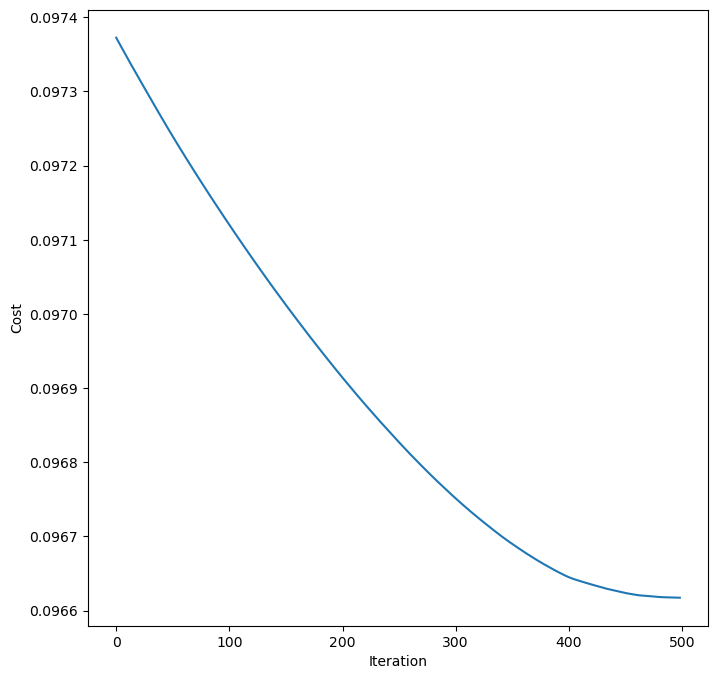

After optimization:  0.1924765706062317 0.0007583159022033215 4.3785644


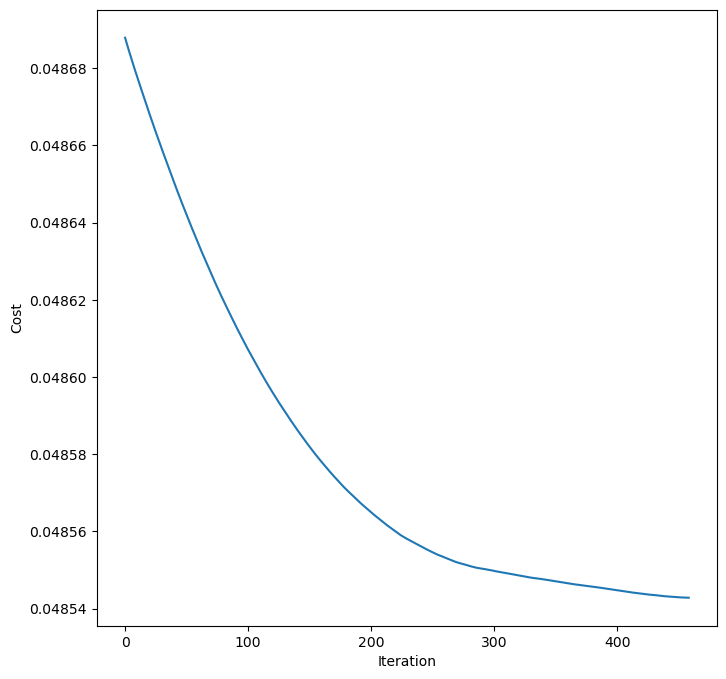

After optimization:  0.19333024322986603 0.00028033924172632396 4.3937445


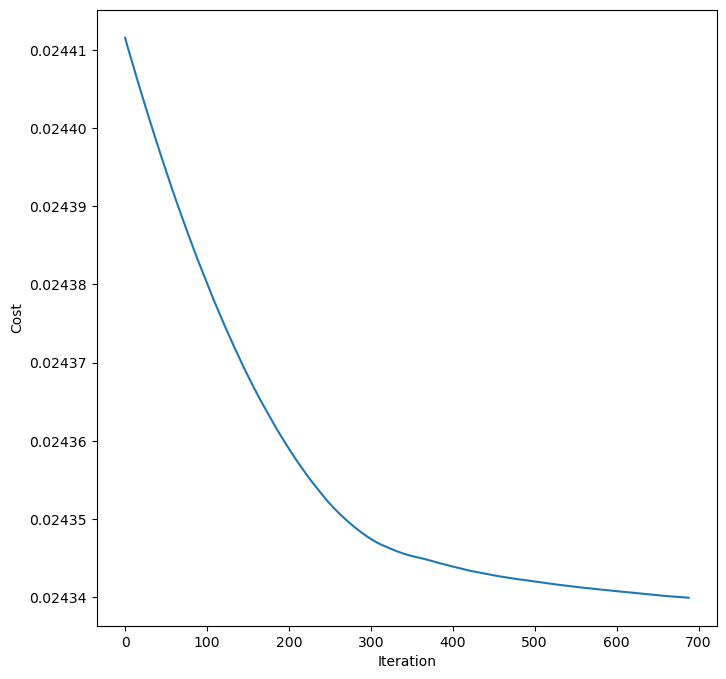

After optimization:  0.19422341883182526 7.084635581122711e-05 4.406275


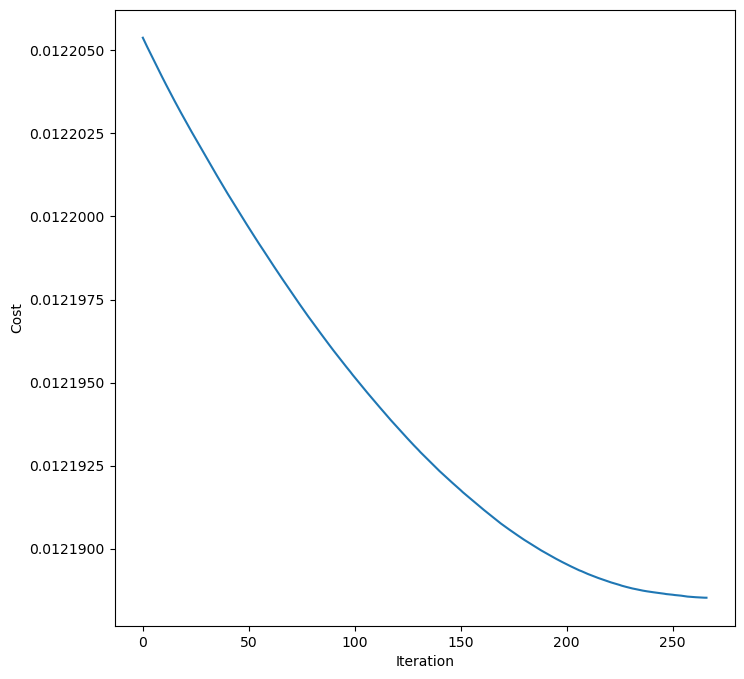

After optimization:  0.19473163783550262 1.898187110782601e-05 4.412626


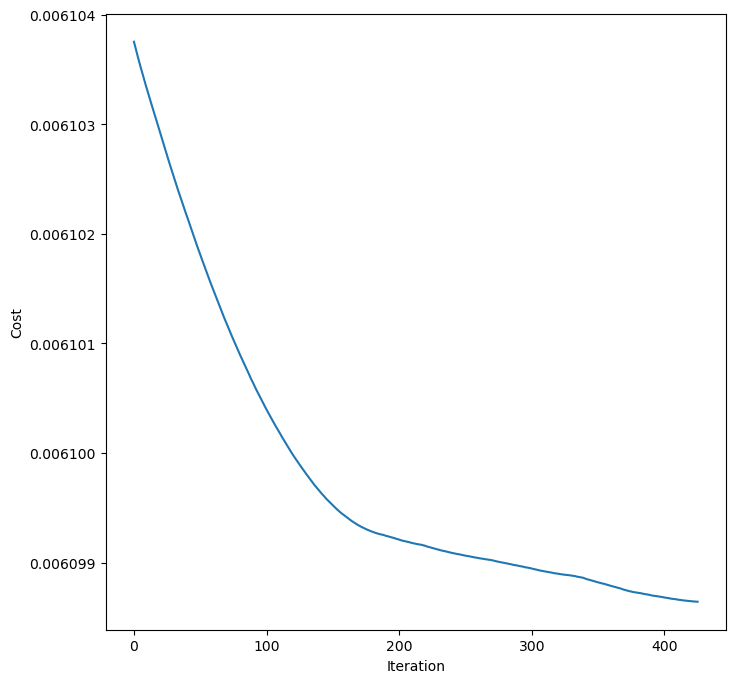

After optimization:  0.19500598311424255 4.8574756874586456e-06 4.415893


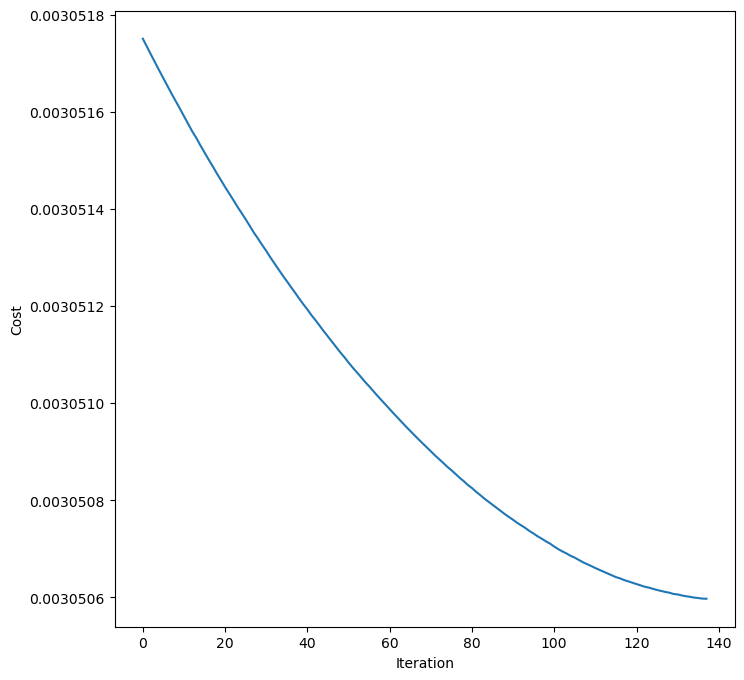

After optimization:  0.19515247642993927 1.3606162383439369e-06 4.417591


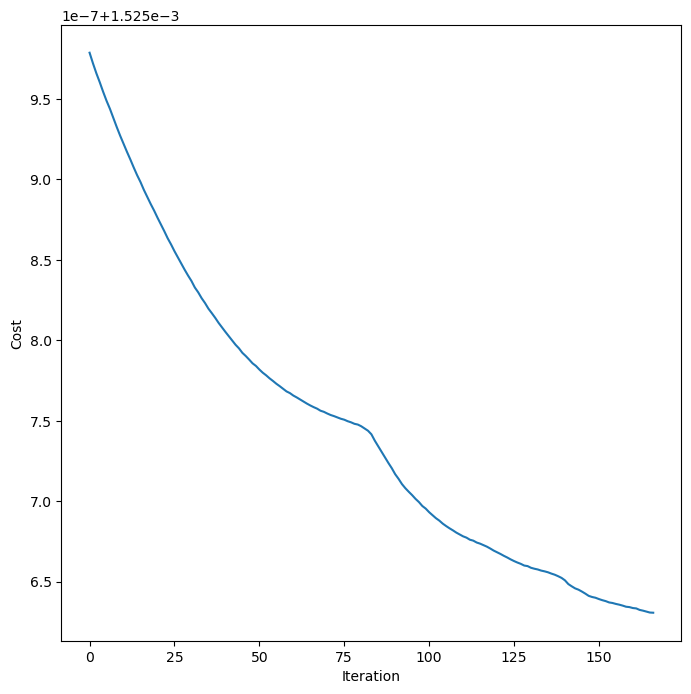

After optimization:  0.1952347755432129 3.617997492710856e-07 4.418534


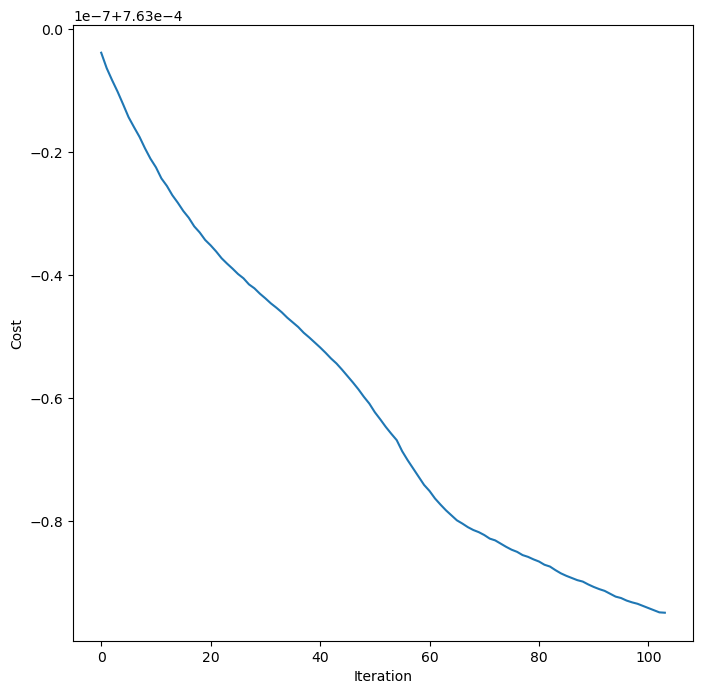

After optimization:  0.1952773779630661 1.0326456845177745e-07 4.4190187


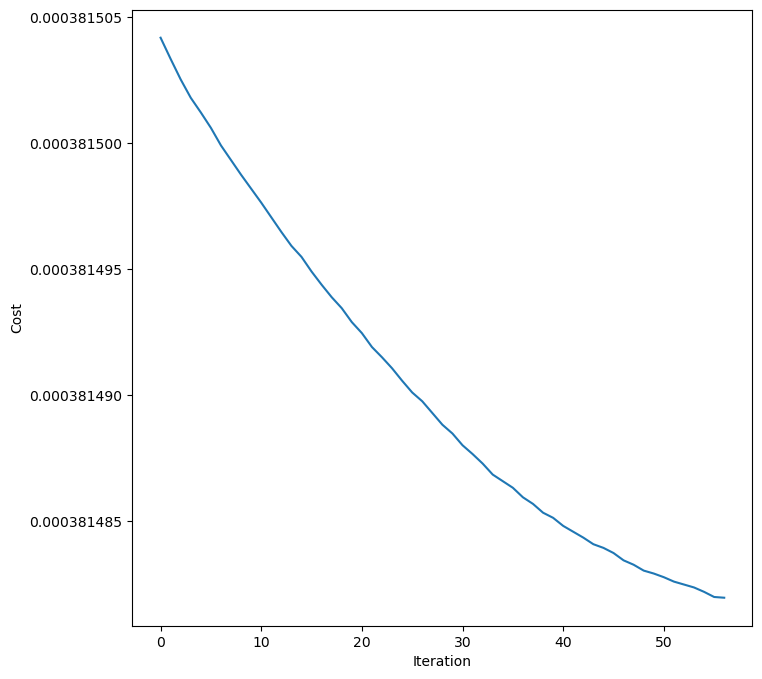

After optimization:  0.1952984631061554 3.971744177988512e-08 4.419258


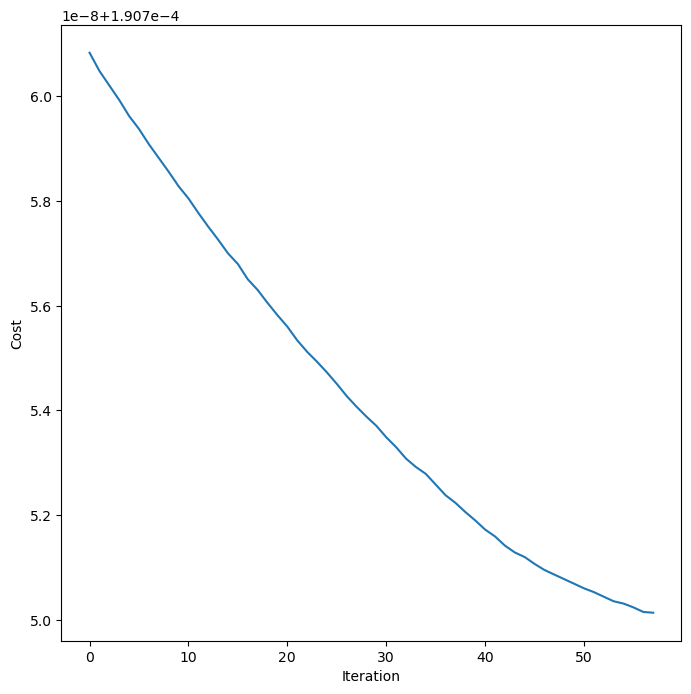

After optimization:  0.1953134387731552 1.4384407442946667e-08 4.419428


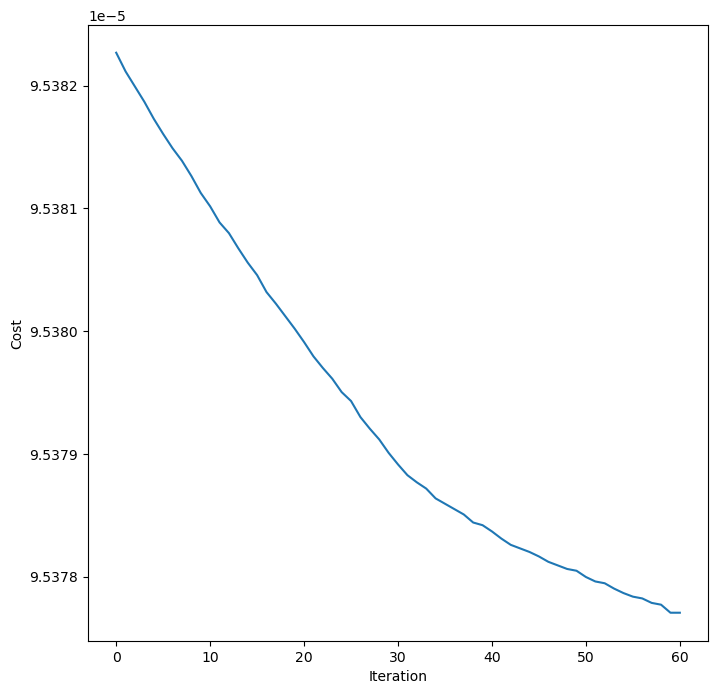

After optimization:  0.19532281160354614 5.2393356320123985e-09 4.419534


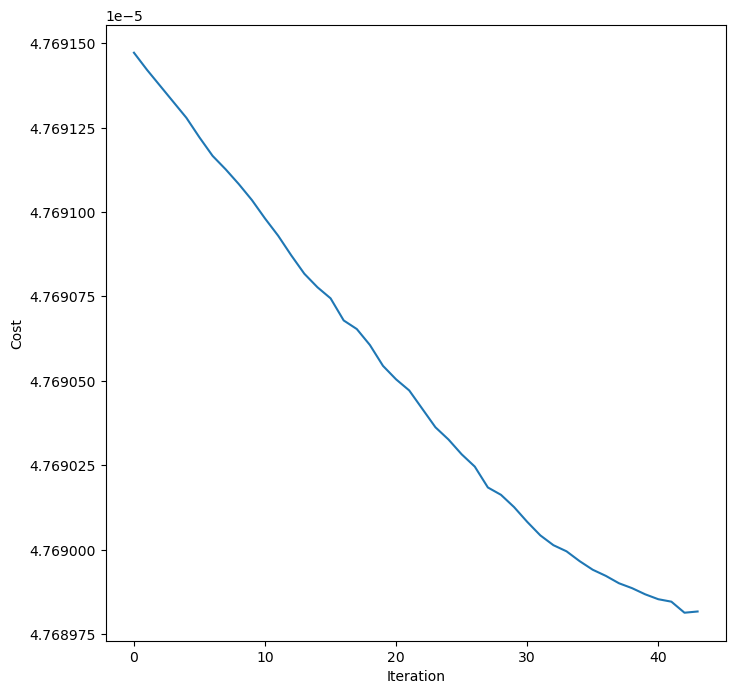

After optimization:  0.1953275054693222 2.4359176897803536e-09 4.419587


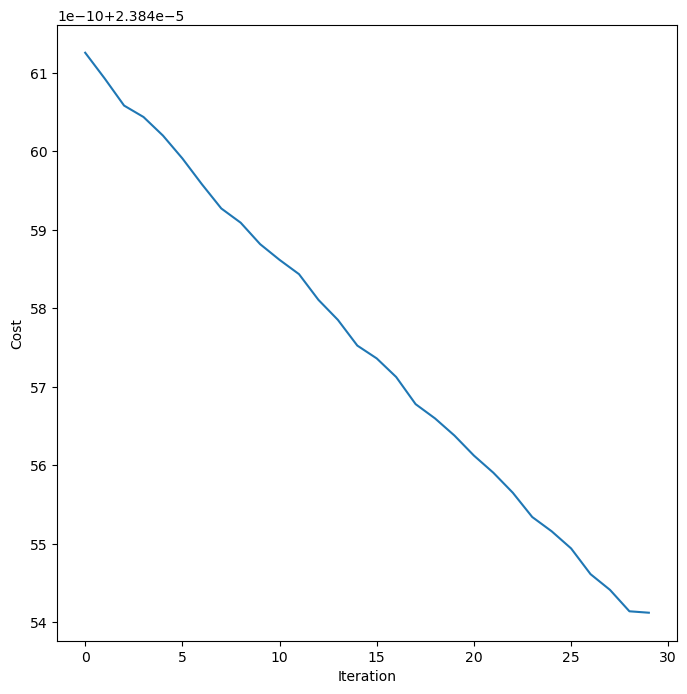

After optimization:  0.195329949259758 1.4241798851344356e-09 4.419615


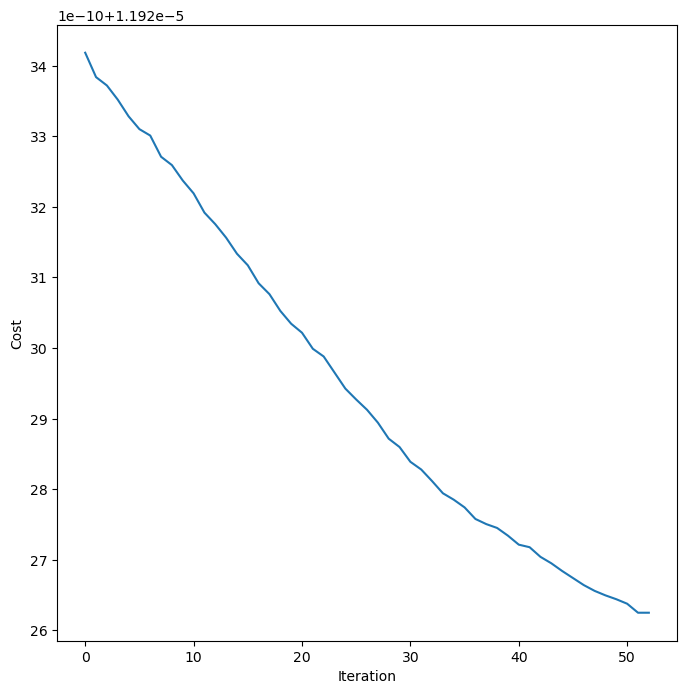

After optimization:  0.19533370435237885 4.0162564940438017e-10 4.419657


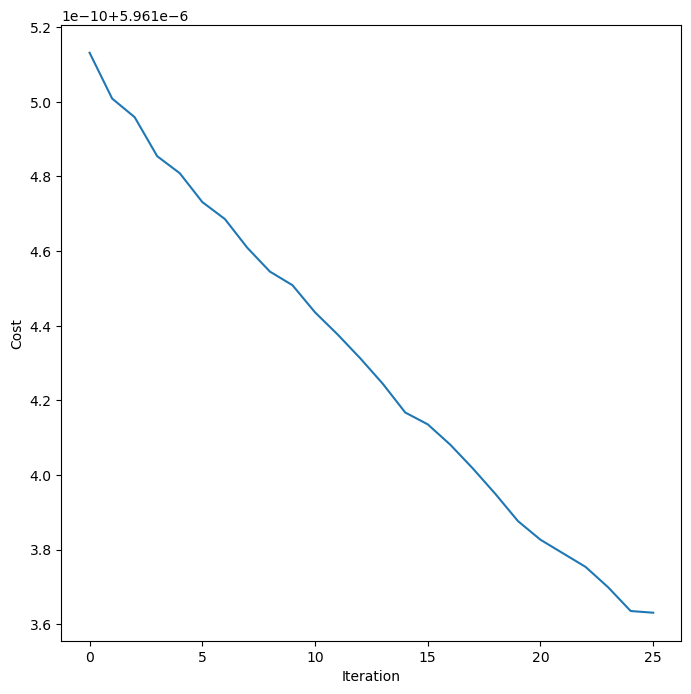

After optimization:  0.19533474743366241 2.1974652653078408e-10 4.419669


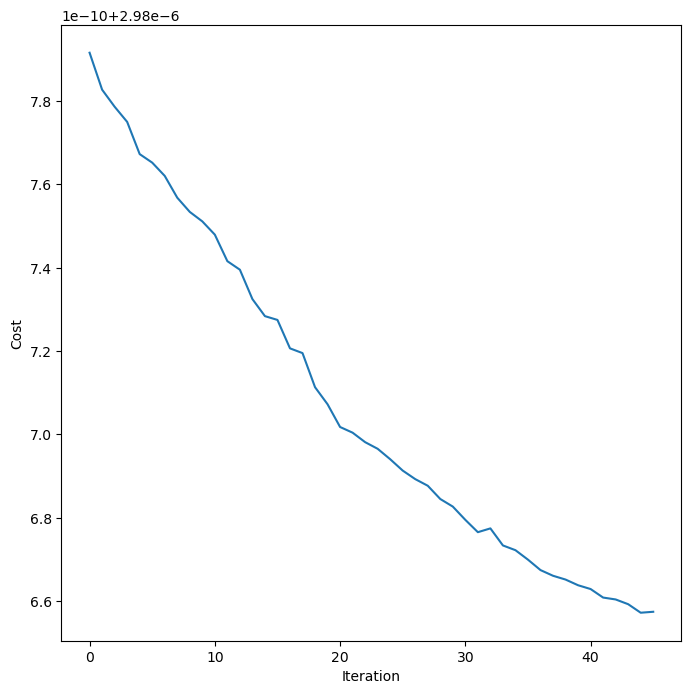

After optimization:  0.19533617794513702 6.381618844475412e-11 4.4196854


SolutionCollectionSquare(comment='', xyt=array([[[-1.9035348 , -1.354677  ,  2.9507496 ],
        [-1.9004985 , -0.3213914 ,  2.9534209 ],
        [-1.8977911 ,  0.71220607,  2.9664598 ],
        [-1.9039639 ,  1.7546052 ,  2.9423478 ],
        [-1.650606  , -1.7891966 , -0.19117677],
        [-1.3150957 , -1.3406241 ,  2.949905  ],
        [-1.6352242 , -0.75313795, -0.18775386],
        [-1.301425  , -0.30276868,  2.9598308 ],
        [-1.6353577 ,  0.28351638, -0.1750317 ],
        [-1.3056235 ,  0.7294087 ,  2.9669952 ],
        [-1.6383828 ,  1.3171608 , -0.17515126],
        [-1.3086425 ,  1.7630695 ,  2.966603  ],
        [-1.0625606 , -1.7755489 , -0.19242577],
        [-0.72677594, -1.3274742 ,  2.9498749 ],
        [-1.0457368 , -0.7401112 , -0.19168833],
        [-0.7101799 , -0.2923708 ,  2.9498694 ],
        [-1.0395161 ,  0.3025569 , -0.17343552],
        [-0.70880663,  0.74126345,  2.9682398 ],
        [-1.046104  ,  1.3344206 , -0.17560087],
        [-0.7126293 ,  1.775

In [ ]:
importlib.reload(pack_io)
import lbfgs_torch_parallel
importlib.reload(lbfgs_torch_parallel)
s = mine[0][54]
print(pack_cost.CollisionCostSeparation().compute_cost_ref(s)[0])
print(pack_cost.CollisionCostSeparation().compute_cost_allocate(s)[0])
pack_io.legalize(s, do_plot=True, move_factor=100., tolerance_rel_change=1e-7)